In [56]:
#Loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
#Data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeLinq
from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#conbine al model aka ensembling
from mlxtend.classifier import StackingCVClassifier
# import pandas_profiling as pp
import warnings 
warnings.filterwarnings("ignore")

In [57]:
data = pd.read_csv("Downloads/heartdata.csv")
# data source
# https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
# age
# sex
# chest pain type (4 values)(0->NAP, 1->ASY, 2-> ATA, 3->TA )
# resting blood pressure
# serum cholestoral in mg/dl
# fasting blood sugar > 120 mg/dl
# resting electrocardiographic results (values 0,1,2) (0->Normal, 1-> ST, 2-> LVH)
# maximum heart rate achieved
# exercise induced angina
# oldpeak = ST depression induced by exercise relative to rest
# the slope of the peak exercise ST segment
# number of major vessels (0-3) colored by flourosopy
# thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [58]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [59]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [60]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [62]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [63]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [64]:
# checking the distribution of condition variable
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:>

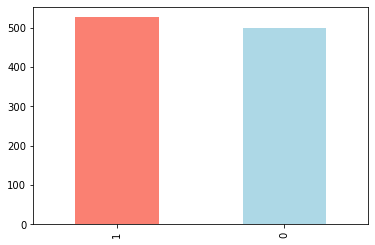

In [65]:
#exploratory data analysis
data.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

We have 526 people with heart disease and 499 people without heart disease, so our problem is balanced.
Now let's split the dataset into categorical and continous for more visualization

In [66]:
# the syntax here means if the data lenght is less than or equal to 10 it should insert the vairable inside categorical otherwisise continous
categorical_val = []
continous_val = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex : [1 0]
cp : [0 1 2 3]
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs :

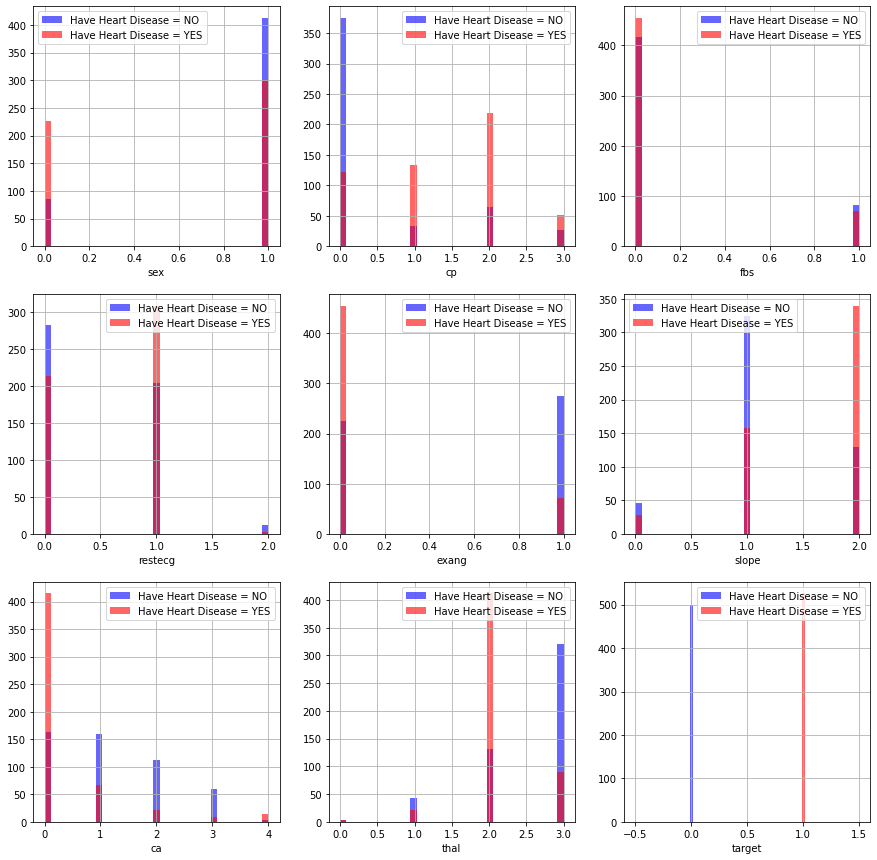

In [67]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Observations from the above plot:

1.cp {Chest pain}: People with cp 1, 2, 3 are more likely to have heart disease than people with cp 0.

2.restecg {resting EKG results}: People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.

3.exang {exercise-induced angina}: people with a value of 0 (No ==> angina induced by exercise) have more heart disease than people with a value of 1 (Yes ==> angina induced by exercise)

4.slope {the slope of the ST segment of peak exercise}: People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).

5.ca {number of major vessels (0-3) stained by fluoroscopy}: the more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.

6.thal {thalium stress result}: People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.

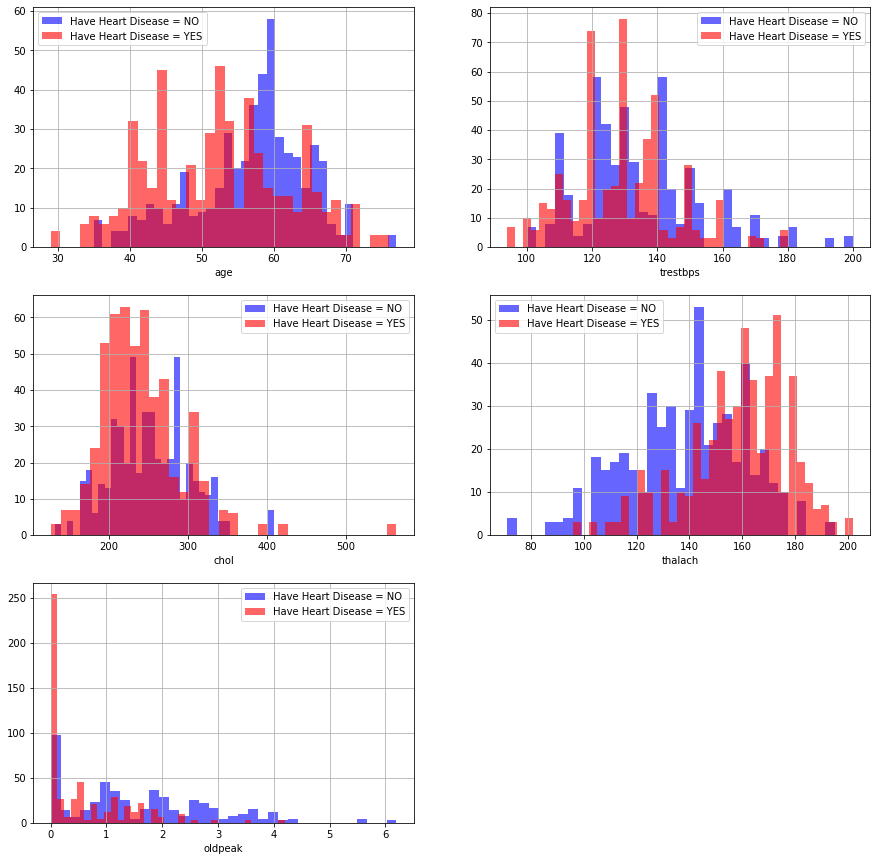

In [68]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Observations from the above plot:

1. trestbps: resting blood pressure anything above 120-140mm/Hg is generally of concern
2. chol: greater than 200 is of concern.
3. thalach: People with a maximum of over 140 are more likely to have heart disease.
4. the old peak of exercise-induced ST depression vs. rest looks at heart stress during exercise an unhealthy heart will stress more.

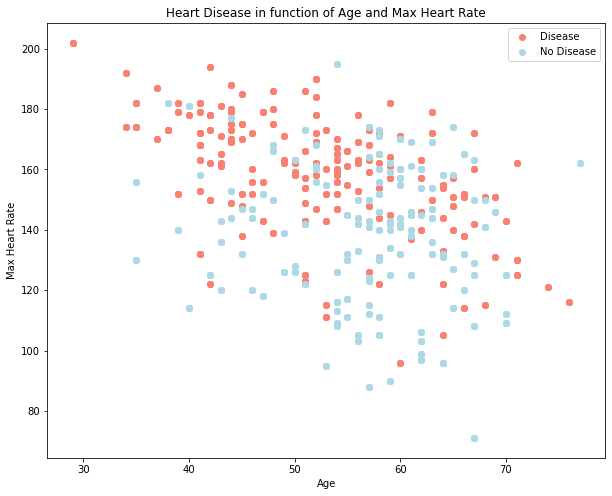

In [69]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

(14.5, -0.5)

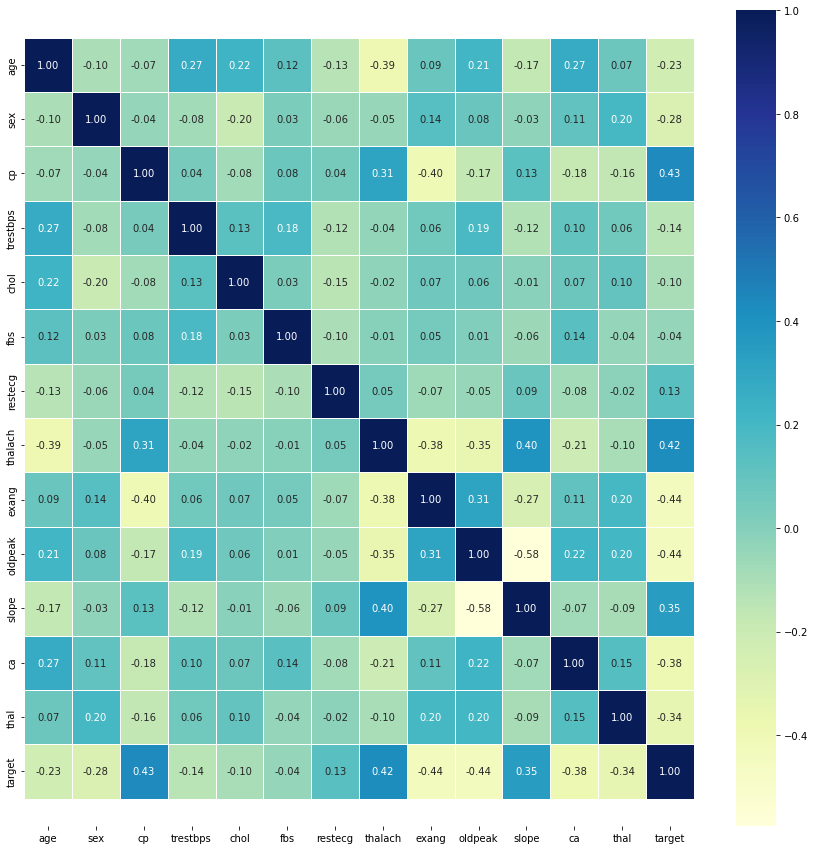

In [70]:
# Let's make our correlation matrix a little prettier
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with target'}>

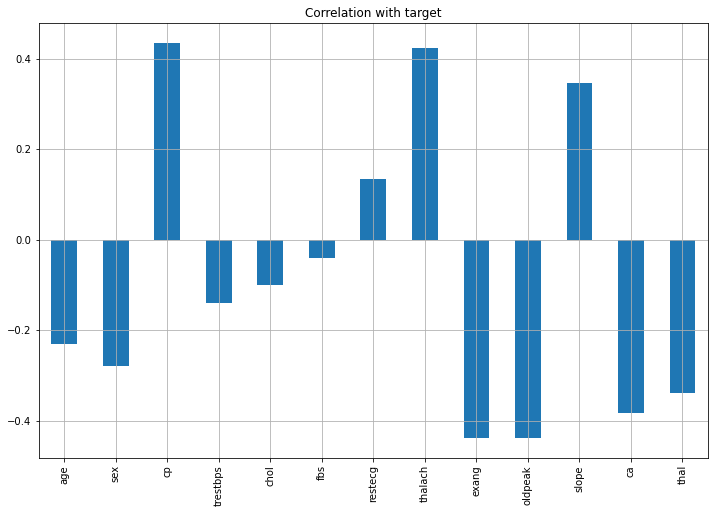

In [71]:
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [72]:
y = data["target" ]
X = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
#normalizing the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#The training info
print('X_Train Shape',X_train.shape)
print('Y_Train Shape',y_train.shape)
print('X_Test Shape',X_test.shape)
print('Y_Test Shape',y_test.shape)

X_Train Shape (820, 13)
Y_Train Shape (820,)
X_Test Shape (205, 13)
Y_Test Shape (205,)


In [73]:
# #The final data set
pd.set_option('display.max_columns',None)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [74]:
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({1: 419, 0: 401})

In [75]:
m1 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print ("confussion matrix" )
print (nb_conf_matrix)
print("\n")
print ("Accuracy of Naive Bayes model:", nb_acc_score*100, '\n')
print (classification_report(y_test, nbpred))

confussion matrix
[[79 19]
 [11 96]]


Accuracy of Naive Bayes model: 85.36585365853658 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [76]:
#Building a predictive system Naive Bayes
input_data = (58,1,0,114,318,0,2,140,0,4.4,0,3,1)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
norm_data = scaler.transform(input_data_reshaped)
prediction = nb.predict(norm_data)
print(prediction)

if(prediction[0] == 0):
    print('This person does not have a Heart Disease')
else:
     print('This person has  Heart Disease')

[0]
This person does not have a Heart Disease


In [77]:
m2= 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predicted)
lr_acc_score = accuracy_score(y_test, lr_predicted)
print ("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print (classification_report(y_test,lr_predicted))

confusion matrix
[[ 77  21]
 [  7 100]]


Accuracy of Logistic Regression: 86.34146341463415 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [78]:
#Building a predictive system Logistic Regression
input_data = (58,1,0,114,318,0,2,140,0,4.4,0,3,1)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
norm_data = scaler.transform(input_data_reshaped)
prediction = lr.predict(norm_data)
print(prediction)

if(prediction[0] == 0):
    print('This person does not have a Heart Disease')
else:
     print('This person has  Heart Disease')

[0]
This person does not have a Heart Disease


In [79]:
m3= 'Random Forest Classifier'
rf = RandomForestClassifier(n_estimators=20, random_state=2, max_depth =5 )
model = rf.fit(X_train, y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print ("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest Classifier:",rf_acc_score*100,'\n')
print (classification_report(y_test,rf_predicted))

confusion matrix
[[ 89   9]
 [  2 105]]


Accuracy of Random Forest Classifier: 94.6341463414634 

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        98
           1       0.92      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



In [80]:
#Building a predictive system Random Forest Classifier
input_data = (58,1,0,114,318,0,2,140,0,4.4,0,3,1)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
norm_data = scaler.transform(input_data_reshaped)
prediction = rf.predict(norm_data)
print(prediction)

if(prediction[0] == 0):
    print('This person does not have a Heart Disease')
else:
     print('This person has  Heart Disease')

[0]
This person does not have a Heart Disease


In [81]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52, colsample_bytree= 0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print ("confusion matrix")
print(xgb_conf_matrix)
print("\n")
print( "Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confusion matrix
[[ 86  12]
 [  6 101]]


Accuracy of Extreme Gradient Boost: 91.21951219512195 

              precision    recall  f1-score   support

           0       0.93      0.88      0.91        98
           1       0.89      0.94      0.92       107

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



In [82]:
#Building a predictive system Random Forest Classifier
input_data = (58,1,0,114,318,0,2,140,0,4.4,0,3,1)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
norm_data = scaler.transform(input_data_reshaped)
prediction = xgb.predict(norm_data)
print(prediction)

if(prediction[0] == 0):
    print('This person does not have a Heart Disease')
else:
     print('This person has  Heart Disease')

[0]
This person does not have a Heart Disease


In [83]:
m5 = 'K-NeigbborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print ("confusion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeigbborsClassifier:",knn_acc_score*100,'\n')
print (classification_report(y_test,knn_predicted))

confusion matrix
[[84 14]
 [11 96]]


Accuracy of K-NeigbborsClassifier: 87.8048780487805 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [84]:
#Building a predictive system K-NeigbborsClassifier
input_data = (58,1,0,114,318,0,2,140,0,4.4,0,3,1)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
norm_data = scaler.transform(input_data_reshaped)
prediction = knn.predict(norm_data)
print(prediction)

if(prediction[0] == 0):
    print('This person does not have a Heart Disease')
else:
     print('This person has  Heart Disease')

[0]
This person does not have a Heart Disease


In [85]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion= 'entropy', random_state = 0, max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print ("confusion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of Decision Tree Classifier:",dt_acc_score*100,'\n')
print (classification_report(y_test,dt_predicted))

confusion matrix
[[95  3]
 [ 8 99]]


Accuracy of Decision Tree Classifier: 94.6341463414634 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [86]:
#Building a predictive system DecisionTreeClassifier
input_data = (58,1,0,114,318,0,2,140,0,4.4,0,3,1)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
norm_data = scaler.transform(input_data_reshaped)
prediction = dt.predict(norm_data)
print(prediction)

if(prediction[0] == 0):
    print('This person does not have a Heart Disease')
else:
     print('This person has  Heart Disease')

[0]
This person does not have a Heart Disease


In [87]:
m7 = 'Support Vector Classifier'
svc = SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print ("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print (classification_report(y_test,svc_predicted))

confusion matrix
[[ 94   4]
 [  0 107]]


Accuracy of Support Vector Classifier: 98.04878048780488 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        98
           1       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



In [88]:
#Building a predictive system Support Vector Classifier
input_data = (58,1,0,114,318,0,2,140,0,4.4,0,3,1)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
norm_data = scaler.transform(input_data_reshaped)
prediction = svc.predict(norm_data)
print(prediction)

if(prediction[0] == 0):
    print('This person does not have a Heart Disease')
else:
     print('This person has  Heart Disease')

[0]
This person does not have a Heart Disease


Support Vector Classifier tends to have the best accuracy at 98% and the FN is zero, 
i tried to test the model with a unique dataset by inputing the parameter to the predictive system and  it gave me good accurate result

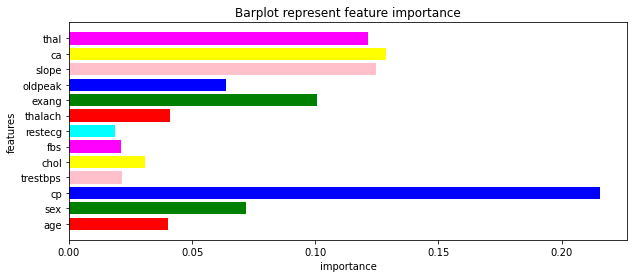

In [89]:
colors = ["red", "green", "blue", "pink", "yellow", "magenta", "cyan"]
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach',
                                        'exang', 'oldpeak','slope', 'ca', 'thal'], ' Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("Barplot represent feature importance")
plt. xlabel ("importance")
plt.ylabel("features" )
plt.barh(imp_feature['Feature'], imp_feature[' Importance'],color = colors)
plt.show()

The important variable in the dataset is CP(Chest pain)

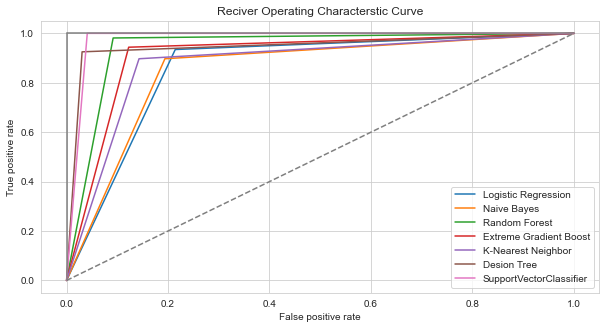

In [90]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predicted)
nb_false_positive_rate,nb_true_positive_rate, nb_threshold = roc_curve(y_test, nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold=roc_curve(y_test,rf_predicted)
xgb_false_positive_rate, xgb_true_positive_rate, xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate, knn_true_positive_rate, knn_threshold = roc_curve (y_test, knn_predicted)
dt_false_positive_rate, dt_true_positive_rate,dt_threshold = roc_curve(y_test, dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test, svc_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate, nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate, label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate, knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate, dt_true_positive_rate, label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='SupportVectorClassifier')
plt.plot([0,1],ls= '--')
plt.plot([0,0], [1,0], c='.5')
plt.plot ([1,1], c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [91]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Extreme Gradient Boost',
                                   'K-Nearest Neighbour', 'Decision Tree', 'Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                            nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,86.341463
1,Naive Bayes,85.365854
2,Random Forest,94.634146
3,Extreme Gradient Boost,91.219512
4,K-Nearest Neighbour,87.804878
5,Decision Tree,94.634146
6,Support Vector Machine,98.048780


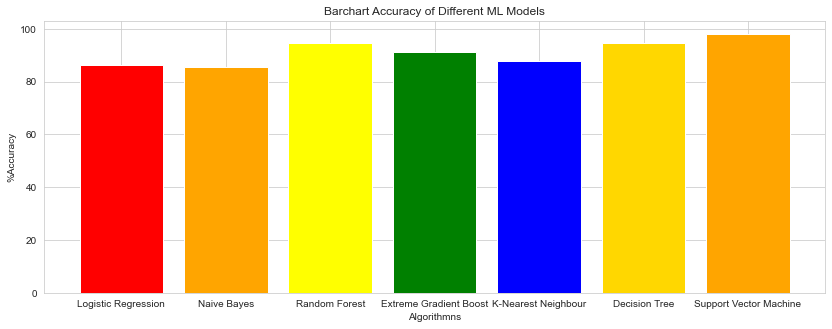

In [92]:
colors = ['red','orange', 'yellow', 'green' , 'blue' , 'gold', 'orange']
plt.figure(figsize=(14,5))
plt.title("Barchart Accuracy of Different ML Models")
plt.xlabel("Algorithmns")
plt.ylabel("%Accuracy" )
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [93]:
# Ensemble with SVM, DT and KNN 
scv=StackingCVClassifier(classifiers=[svc,dt,knn],meta_classifier=svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score (y_test, scv_predicted)
print ("confusion matrix")
print(scv_conf_matrix)
print("\n")
print ("Accuracy of StackingCVClassifier:", scv_acc_score*100, ' \n')
print (classification_report (y_test,scv_predicted))

confusion matrix
[[97  1]
 [ 8 99]]


Accuracy of StackingCVClassifier: 95.60975609756098  

              precision    recall  f1-score   support

           0       0.92      0.99      0.96        98
           1       0.99      0.93      0.96       107

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



# *Inference & Conclusion*
1) SVM gives the best Accuracy, followed by DT and KNN compared to other models.
2) Least accuracy was from Naive Bayes (possible because of probability computation)
3) Detailed Analysis show that Exercise induced angina, "Chest pain" is the major symptoms of heart attack.
4) Sadly, ensembling technique decreased the accuracy of the model as the combination of SVM, KNN and DT gave the lesser accuracy (96%)
